Name: jorge blanco
    
Student ID: 24246948

In [171]:
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf

In [172]:
class ServiceTask5 :
    """
        Service helper for task 5
    """
        
    def generate_fixed_second_order(self, a, b, c):
        """Generate a fixed polynomial
        """
        
        """
            Parameters
            ----------
            :a - a
            :b - b
            :c - c
        """
        
        return self.PolynomialTask5.generate_fixed_second_order(a, b, c)
    
    def generate_random_polynomial(self, max_coefficient, max_exponent):
        """Generate a random polynomial
        """
        
        """
            Parameters
            ----------
            :max_coefficient - maximum coefficient
            :max_exponent - maximum exponent value 
        """
        
        return self.PolynomialTask5.generate_random(max_coefficient, max_exponent + 1)
    
    @staticmethod
    def plot_polynomial_with_jitter(max_exponent, x, y, y_obs):
        """Plot the polynomial with the jitter 
        """
        
        """
            Parameters
            ----------
            :max_exponent - max exponent value for the polynomial
            :x - data set
            :y - polynomial result
            :y_obs - jitter data based on the polynomial result
        """
        
        plt.figure()
        plt.plot(x, y, label='y')
        plt.plot(x, y_obs,'r+', label='Training Data')     
        plt.title( f'Polynomial graph with jitter - max. exponent ({max_exponent})')
        plt.legend()
        plt.grid()
        plt.show()
      
    @staticmethod
    def plot_training_polynomial_vs_random_polynomial(x, y_obs, y_hat, error):
        """Plot the polynomial with the jitter 
        """
        
        """
            Parameters
            ----------
            :x - data set
            :y_obs - test polynomial result
            :y_hat - random polynomial result
            :error - y_obs - y_hat
        """
        
        plt.figure()
        plt.plot(x, y_obs,'r+', label='Training Data')
        plt.plot(x, y_hat, label='Input Data')
        
        plt.title('training polynomial vs random polynomial (Loss = {:.3})'.format(error))
        plt.legend()
        plt.grid()
        plt.show()

    @staticmethod
    def plot_training_data_vs_gradient_instance(x, y_obs , y_hat,loss_with_gd, loss_no_gd, runs):
        """Plot the polynomial after a gradient descent execution 
        """
        
        """
            Parameters
            ----------
            :max_exponent - max exponent value for the polynomial
            :x - data set
            :y_obs - polynomial result
            :y_hat - result of the initial model after one gradient descent execution
            :loss_with_gd - mse value after one gradient descent execution
            :loss_no_gd - mse value without the gradient descent execution
            :runs - number of runs 
        """
        
        print("Model improved" if loss_with_gd < loss_no_gd else "Model worsening")
        
        plt.figure()
        plt.plot(x, y_obs,'r+', label='Training Data')
        plt.plot(x, y_hat, label='Input Data with GD - (Loss = {:.3})'.format(loss_with_gd))
        plt.title(F'Training data vs gradient after {runs} runs')
        plt.legend()
        plt.grid()
        plt.show()
        
    @staticmethod
    def plot_mse_over_all_executions(loss_values, runs):
        """Plot all the MSE values
        """
        
        """
            Parameters
            ----------
            :loss_values - Loss value over all executions
            :runs - number of runs ( 0 - based )
        """

        plt.figure()
        epochs = range(len(loss_values))
        plt.semilogy(epochs, loss_values, label='Loss')
        
        plt.title(f'Loss value over {runs} runs and stored {len(loss_values) - 1}')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid()#
        plt.show()
        
    class PolynomialTask5:

        def __init__(self, elements):
            self._elements = elements
            self._max_exponent = max([t[1] for t in elements])
            self.polynomial_elements = self._convert_to_polynomial_elements(elements)
    
        def __str__(self):
            return f"{self._elements}"
        
        def get_max_exponent(self):
            """
                Get the maximum exponent of the polynomial
            """
            
            return  self._max_exponent
            
        def _convert_to_polynomial_elements(self, elements) :
            return [ self.PolynomialElement(constant=i[0]) if i[1] == 0 else self.PolynomialElement(coefficient=i[0], exponent= i[1])  for i in elements]
        
        @classmethod
        def generate_random(cls, max_coefficient, max_exponent):
            """
            Generate a random polynomial
            """
            
            """
                Parameters
                ----------
                :max_coefficient - maximum coefficient
                :max_exponent - maximum exponent value 
            """
                         
            coefficients = np.random.randint(max_coefficient * -1, max_coefficient, max_exponent) 
            all_values = set(range(0, max_exponent))
            elements = list(zip(coefficients, sorted(list(all_values), reverse=True)))
            
            return cls(elements)
        
        @classmethod
        def generate_fixed_second_order(cls, a, b, c):
            """
            Generate a fixed polynomial of the second degree
            """
            
            """
                Parameters
                ----------
                :a - a
                :b - b
                :c - c
            """
            
            elements = [(a, 2), (b, 1),( c, 0)]
            
            return cls(elements)
    
        def jitter(self, y, j):
            """generate a jitter data from input data
            """
            
            """
                Parameters
                ----------
                :y - polynomial result
                :j - jitter range value 
            """
            
            return np.random.uniform(y - j, y + j)
    
        def evaluate(self, x):
            """Evaluate the polynomial
            """
            
            """
                Parameters
                ----------
                :x - data set
            """
            
            return sum([i.calculate(x) for i in self.polynomial_elements])
        
        def evaluate_generate_jitter(self, x, j):
            """Evaluate the polynomial and generate a jitter data set 
            """
            
            """
                Parameters
                ----------
                :x - data set
                :j - jitter range value 
            """
            
            y = self.evaluate(x)
            y_obs = self.jitter(y, j)
            return y, y_obs
        
        def apply_gradient_until_threshold(self, x, y_obs, lr_init, exit_threshold, max_number_runs) :
            """Apply gradient until reach the threshold or exit 
            """
            
            """
                Parameters
                ----------
                :x - data set
                :y_obs - y_obs
                :lr_init - initial learning rate, we update the lrn as we loop 
                :exit_threshold - used for the exit condition on the calculation
                :max_number_runs - max number of runs before we exit the calculations  
            """
            
            momentum = 0
            
            loss_values = []
            previous_loss = float('inf')
            index = 0
            while True:
                
                # adopt lr as we loop  
                lr = lr_init * (1 / (1 + 0.01 * index))
                
                current_loss, y_hat, momentum = self.apply_gradient_once(x, y_obs, lr, momentum)
                
                loss_values.append(current_loss)
                 
                if index == max_number_runs :
                    print(f"Max runs reached exit")
                    break
                
                # exit once below the threshold   
                if abs(previous_loss - current_loss) < exit_threshold:
                    break
                    
                previous_loss = current_loss
                index += 1
                
            return loss_values, current_loss, y_hat, index
            
        def apply_gradient_once(self, x, y_obs, lr, momentum) :
            """Execute the gradient decent once 
            """
            
            """
                Parameters
                ----------
                :x - data set
                :y_obs - y_obs
                :lr_init - earning rate
                :lr_init - earning rate
                :momentum - momentum to make sure we dont get stuck in a flat area 
            """
            
            beta = 0.9    # Momentum coefficient
            
            y_hat = self.evaluate(x)
            error = self.calculate_error_value(y_obs, y_hat)
            
            for element in self.polynomial_elements:
                gradient = element.calculate_gradient(error, x)
                
                if (np.isnan(gradient)) or (np.isinf(gradient)) :
                    break
                
                # add momentum as don't want to get stuck - works great for big degrees
                momentum = beta * momentum + (1 - beta) * gradient
                
                element.update_coefficient_constant_using_gradient_and_lr(gradient, lr)
           
            y_hat = self.evaluate(x)
            loss = self.huber_loss(self.calculate_error_value(y_obs, y_hat))
            
            return loss, y_hat, momentum
    
        @staticmethod
        def calculate_error_value(y_obs, y_hat):
            """ECalculate the error value , but clip the result to a max of [-1e10, 1e10]
            """
            
            """
                Parameters
                ----------
                :y_obs - observed y values
                :y_hat - predicted y values from model
            """
            
            return np.clip(y_obs - y_hat, -1e10, 1e10)
    
        @staticmethod
        def loss(error):
            """Evaluate how close we are to the origin using MSE 
            """
            
            """
                Parameters
                ----------
                :error - error value of (y_obs - y_hat)
            """
            
            return np.mean(np.square(error))
        
        # very efficient loss function - for the task at hand
        # since cant use tensorflow - removing it out - for my ref only 
        #@staticmethod
        #def log_cosh_loss(error):
        #    return tf.reduce_mean(tf.math.log(tf.cosh(error)))
    
        @staticmethod
        def huber_loss(error, delta=1.0):
            """Evaluate how close we are to the origin using the huber_loss where we have clustered data + no outliers 
            """
            
            """
                Parameters
                ----------
                :error - error value of (y_obs - y_hat)
                :delta - for the loss calculation 
            """
            
            is_small_error = np.abs(error) <= delta
            small_error_loss = 0.5 * error**2
            large_error_loss = delta * (np.abs(error) - 0.5 * delta)
            
            return np.where(is_small_error, small_error_loss, large_error_loss).mean()
                                 
        class PolynomialElement:
            """
                Store the details of a polynomial
            """

            def __init__(self, coefficient = 0, exponent = 0, constant = None):
                self.coefficient = coefficient
                self.exponent = exponent
                self.constant = constant
             
            def __repr__(self):
                return str(self)
    
            def __str__(self):
                return f"{self.constant}" if self.is_constant() else f"{self.coefficient}x^{self.exponent}"
                
            def is_constant(self):
                """Validate if it is a constant only 
                """
                return not(self.constant is None)
            
            def is_exponent_greater_than_zero(self):
                """Validate if the exponent is greater than 0 
                """
                return self.exponent > 0
            
            def calculate(self, x):
                """calculate the value of the polynomial element 
                """
                
                """
                    Parameters
                    ----------
                    :x - x values 
                """
            
                if self.is_constant():
                    return self.constant
                
                return self.coefficient * (x ** self.exponent)
                
            def calculate_gradient(self, error, x):
                """Get the gradient of the polynomial element
                """
                
                """
                    Parameters
                    ----------
                    :error - error details [ y - y hat ]
                    :x - x values 
                """
                
                if self.is_constant():
                    return np.mean(error) * -2

                return np.mean(x**self.exponent * error) * -2
                
            def update_coefficient_constant_using_gradient_and_lr(self, g, lr):
                """Update the coefficient / constant using the learning rate and gradient
                """
                
                """
                    Parameters
                    ----------
                    :g - gradient for the coefficient
                    :lr - learning rate
                """
                if self.is_constant():
                    self.constant = self.constant - (lr * g)
                else:
                    self.coefficient = self.coefficient - (lr * g)
                

Test polynomial: [-15x^3, -3x^2, -5x^1, 12]


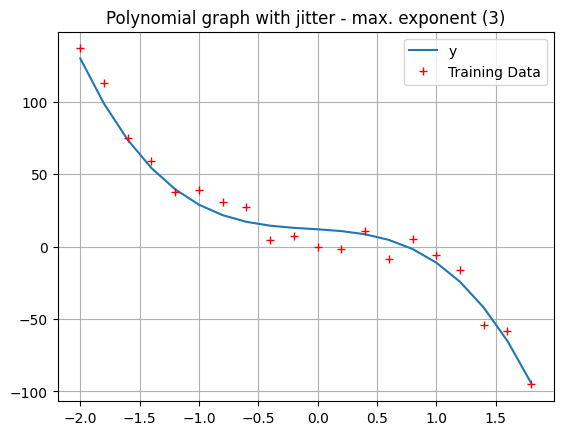

Random polynomial: [-9x^3, -13x^2, 0x^1, -10]


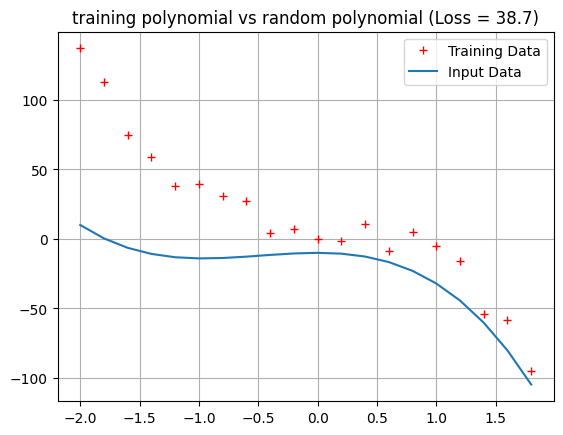

Model improved


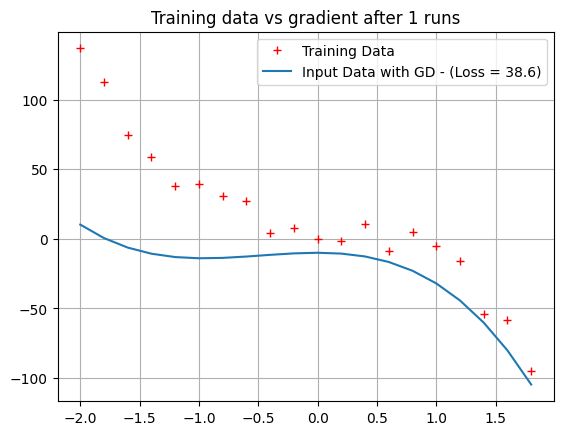

Model improved


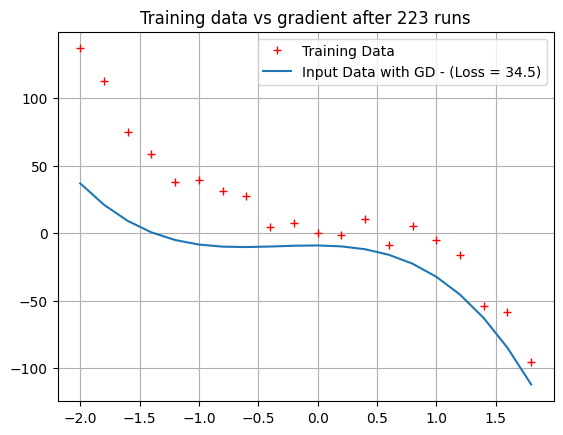

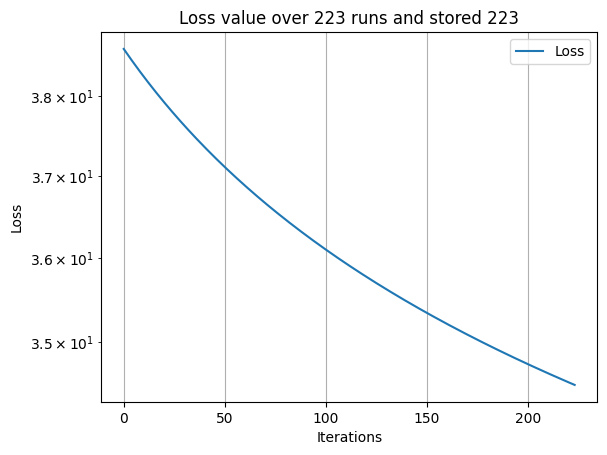

In [174]:
#hyper parameters 

x = np.arange(-2, 2, .2)      
j = 15
lr = 0.0001
exit_threshold = 1e-2
max_number_runs = 5000

mgd = ServiceTask5()

fixed_polynomial = mgd.generate_random_polynomial(15, 3) #mgd.generate_fixed_second_order(2, -4, 1)
print(f"Test polynomial: {fixed_polynomial.polynomial_elements}")
y, y_obs = fixed_polynomial.evaluate_generate_jitter(x, j)

ServiceTask5.plot_polynomial_with_jitter(fixed_polynomial.get_max_exponent(), x, y, y_obs)

# ---- ---- # 

rando_polynomial = mgd.generate_random_polynomial(15, 3)
print(f"Random polynomial: {rando_polynomial.polynomial_elements}")

y_hat = rando_polynomial.evaluate(x)
loss_no_gd = rando_polynomial.huber_loss(rando_polynomial.calculate_error_value(y_obs, y_hat))
ServiceTask5.plot_training_polynomial_vs_random_polynomial(x, y_obs, y_hat, loss_no_gd)

# ---- ---- # 

loss_with_gd, y_hat, momentum = rando_polynomial.apply_gradient_once(x, y_obs, lr, 0)
ServiceTask5.plot_training_data_vs_gradient_instance(x, y_obs, y_hat, loss_with_gd, loss_no_gd, 1)

# ---- ---- # 
los_values, loss_with_gd, y_hat, total_runs = rando_polynomial.apply_gradient_until_threshold(x, y_obs, lr, exit_threshold, max_number_runs)
ServiceTask5.plot_training_data_vs_gradient_instance(x, y_obs, y_hat, loss_with_gd, loss_no_gd, total_runs)
ServiceTask5.plot_mse_over_all_executions(los_values, total_runs)